# AML Reproducibility Challenge


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
# Clone CodeFormer and enter the CodeFormer folder
%cd /content
!rm -rf Reproducibility-Challenge
!git clone https://github.com/KrishnaVeer7712/Reproducibility-Challenge.git
%cd Reproducibility-Challenge

# Set up the environment
# Install python dependencies
!pip install -r requirements.txt
# Install basicsr
!python basicsr/setup.py develop

# Download the pre-trained model
!python scripts/download_pretrained_models.py facelib
!python scripts/download_pretrained_models.py CodeFormer

# Visualization function
import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1) 
  plt.title('Input', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('CodeFormer', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

/content
Cloning into 'Reproducibility-Challenge'...
remote: Enumerating objects: 206, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 206 (delta 25), reused 0 (delta 0), pack-reused 153
Receiving objects: 100% (206/206), 11.66 MiB | 6.73 MiB/s, done.
Resolving deltas: 100% (34/34), done.
/content/Reproducibility-Challenge
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 91.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.9/200.9 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 7.7 MB/s eta 0:00:00
/usr/local/lib/python3.10/dist-packages/setuptools/__init__.py:84: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
!!

        *****************************

&nbsp;
***
&nbsp;
# Testing the images 



In [ ]:
# Upload your own images
import os
from google.colab import files
import shutil

upload_folder = 'inputs/user_upload'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
os.mkdir(upload_folder)

uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

In [ ]:
# Inference the uploaded images
#@markdown `CODEFORMER_FIDELITY`: Balance the quality (lower number) and fidelity (higher number)<br>
# you can add '--bg_upsampler realesrgan' to enhance the background
CODEFORMER_FIDELITY = 0.01 #@param {type:"slider", min:0, max:1, step:0.01}
#@markdown `BACKGROUND_ENHANCE`: Enhance background image with Real-ESRGAN<br>
BACKGROUND_ENHANCE = True #@param {type:"boolean"}
#@markdown `FACE_UPSAMPLE`: Upsample restored faces for high-resolution AI-created images<br>
FACE_UPSAMPLE = False #@param {type:"boolean"}
if BACKGROUND_ENHANCE:
  if FACE_UPSAMPLE:
    !python inference_codeformer.py -w $CODEFORMER_FIDELITY --input_path inputs/user_upload --bg_upsampler realesrgan --face_upsample
  else:
    !python inference_codeformer.py -w $CODEFORMER_FIDELITY --input_path inputs/user_upload --bg_upsampler realesrgan
else:
  !python inference_codeformer.py -w $CODEFORMER_FIDELITY --input_path inputs/user_upload

(338, 315, 3)


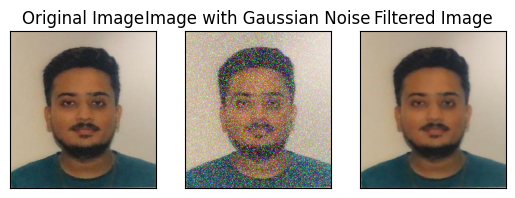

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

import os
import glob

input_folder = 'inputs/user_upload'
result_folder = f'results/user_upload_{CODEFORMER_FIDELITY}/final_results'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
for input_path in input_list:
  # img_input = imread(input_path)
  img = cv2.imread(input_path)
  print(img.shape)
  # Add Gaussian noise to the image
  gaussian_noise = np.random.normal(0, 1, img.size)
  gaussian_noise = gaussian_noise.reshape(img.shape[0], img.shape[1], img.shape[2]).astype('uint8')
  img_with_noise = cv2.add(img, gaussian_noise)

  # Apply spatial filtering to remove the noise
  filtered_img = cv2.medianBlur(img_with_noise, 5)

  # Display the images
  plt.subplot(131),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.title('Original Image'), plt.xticks([]), plt.yticks([])
  plt.subplot(132),plt.imshow(cv2.cvtColor(img_with_noise, cv2.COLOR_BGR2RGB))
  plt.title('Image with Gaussian Noise'), plt.xticks([]), plt.yticks([])
  plt.subplot(133),plt.imshow(cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB))
  plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
  plt.show()
  

(1098, 1024, 3)


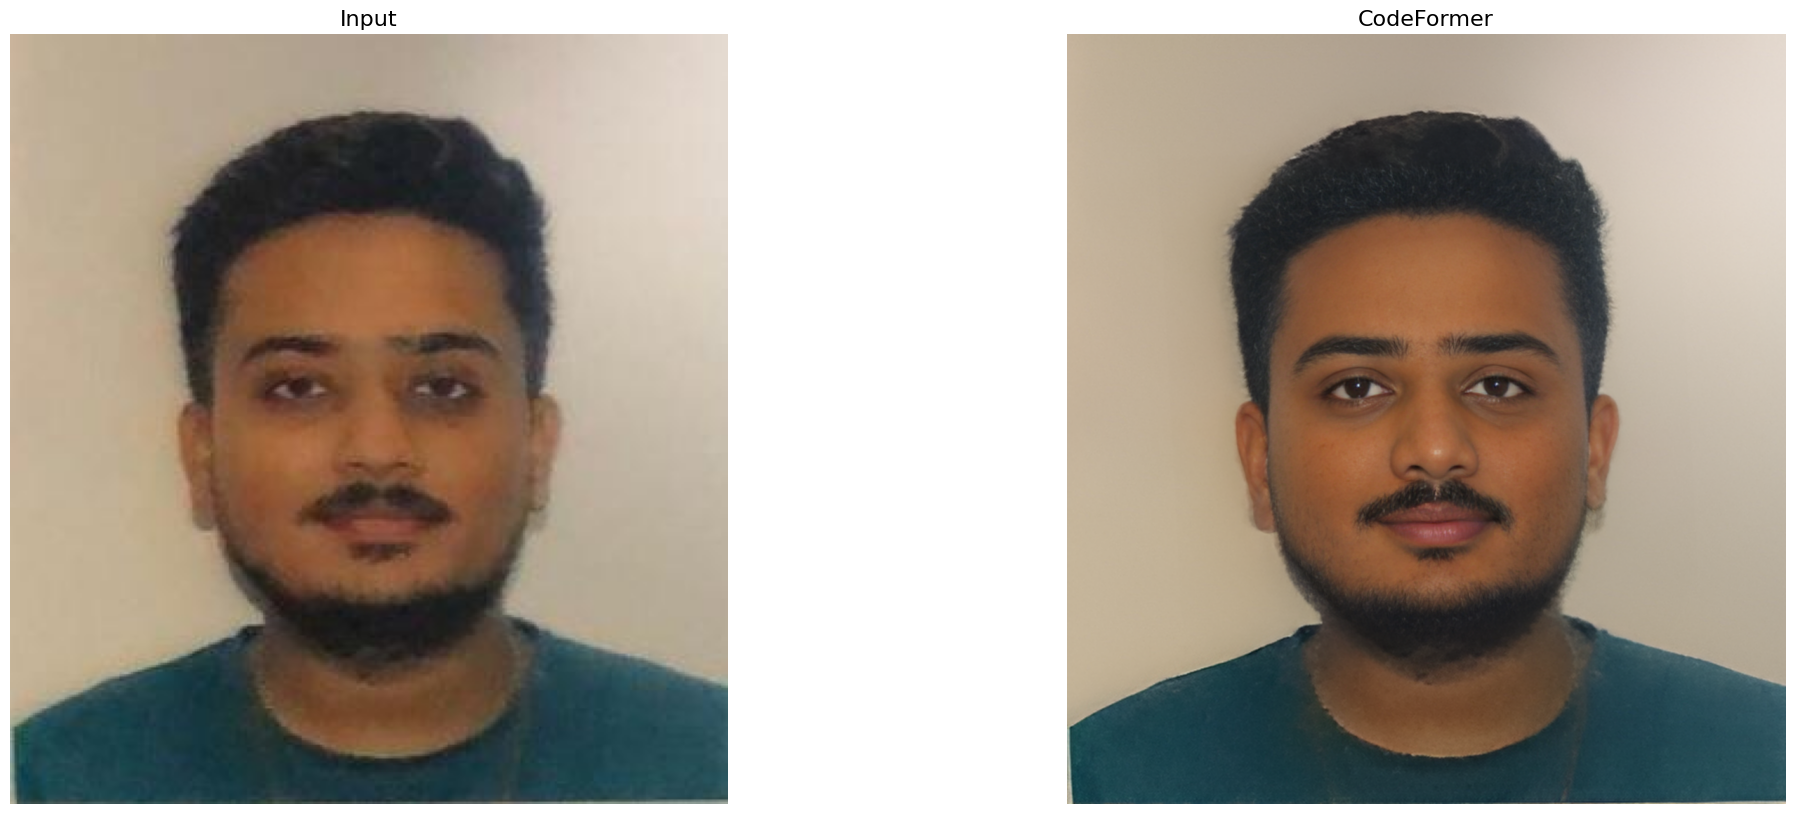

In [ ]:
# Visualize the results
import os
import glob

input_folder = 'inputs/user_upload'
result_folder = f'results/user_upload_{CODEFORMER_FIDELITY}/final_results'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
for input_path in input_list:
  img_input = imread(input_path)
  basename = os.path.splitext(os.path.basename(input_path))[0]
  output_path = os.path.join(result_folder, basename+'.png')
  img_output = imread(output_path) 
  print(img_output.shape)
  display(img_input, img_output)

In [ ]:
# Download results
!ls results
print('Download results')
os.system(f'zip -r results.zip results/user_upload_{CODEFORMER_FIDELITY}/final_results')
files.download("results.zip")

user_upload_0.01
Download results


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import cv2
import requests
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Loading the image of the GFG Logo
img_output1=img_output
# getContent = requests.get(img).content
# array_img = np.asarray(bytearray(getContent), dtype=np.uint8)
 
# Change the color space BGR to RGB
# image_plot = cv2.cvtColor(cv2.imdecode(array_img, -1), cv2.COLOR_BGR2RGB)
 
# Plot the image
# plt.figure(figsize=(10, 10))
# plt.title(img_output1.shape)
# plt.imshow(img_output1)
# plt.show()

In [ ]:
# Model to preprocess the images
def preprocessing(img):
	imageSize = (tf.convert_to_tensor(img_output1.shape[:-1]) // 4) * 4
	cropped_image = tf.image.crop_to_bounding_box(
		img, 0, 0, imageSize[0], imageSize[1])
	preprocessed_image = tf.cast(cropped_image, tf.float32)
	return tf.expand_dims(preprocessed_image, 0)


In [ ]:
# This is a model of Enhanced Super Resolution GAN Model
# The link given here is a model of ESRGAN model
esrgn_path = "https://tfhub.dev/captain-pool/esrgan-tf2/1"
model = hub.load(esrgn_path)


In [ ]:
# Employ the model
def srmodel(img):
	preprocessed_image = preprocessing(img) # Preprocess the LR Image
	new_image = model(preprocessed_image) # Runs the model
	# returns the size of the original argument that is given as input
	return tf.squeeze(new_image) / 255.0


Imput Image: 


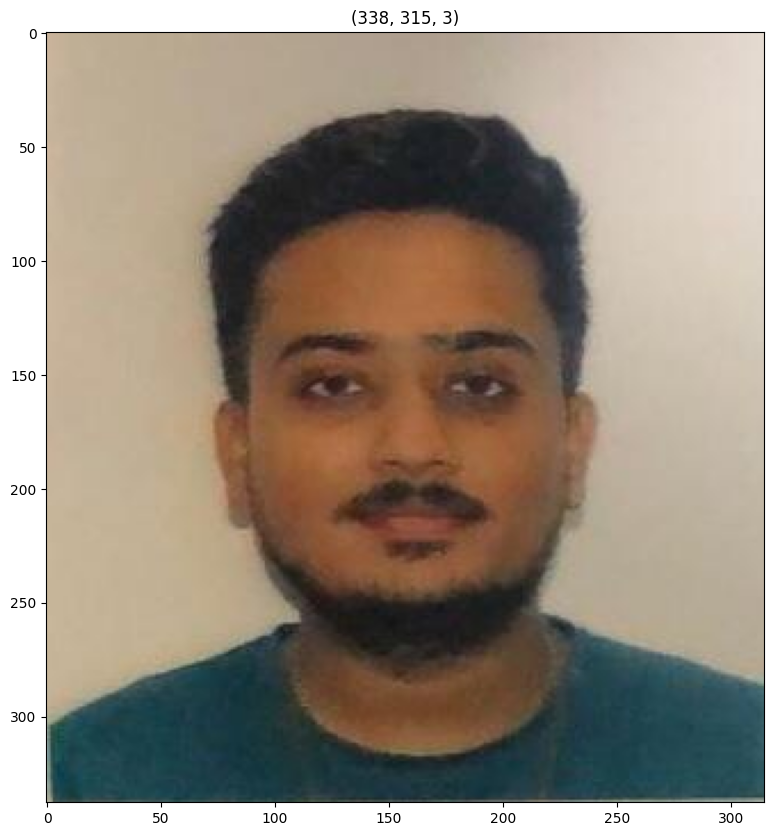

Face Resoration Image: 


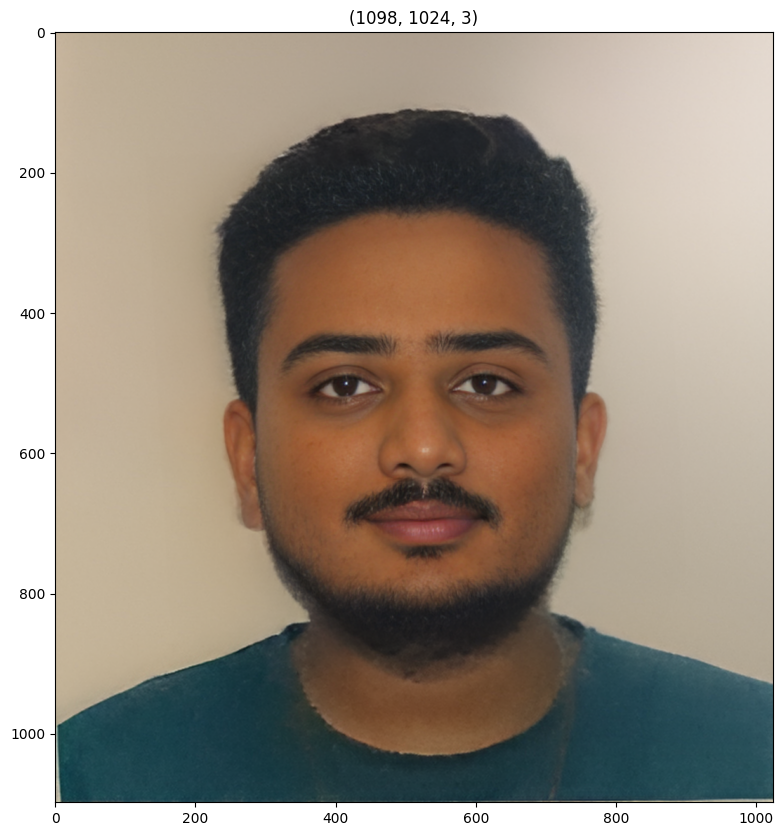

Super Resolution Image: 


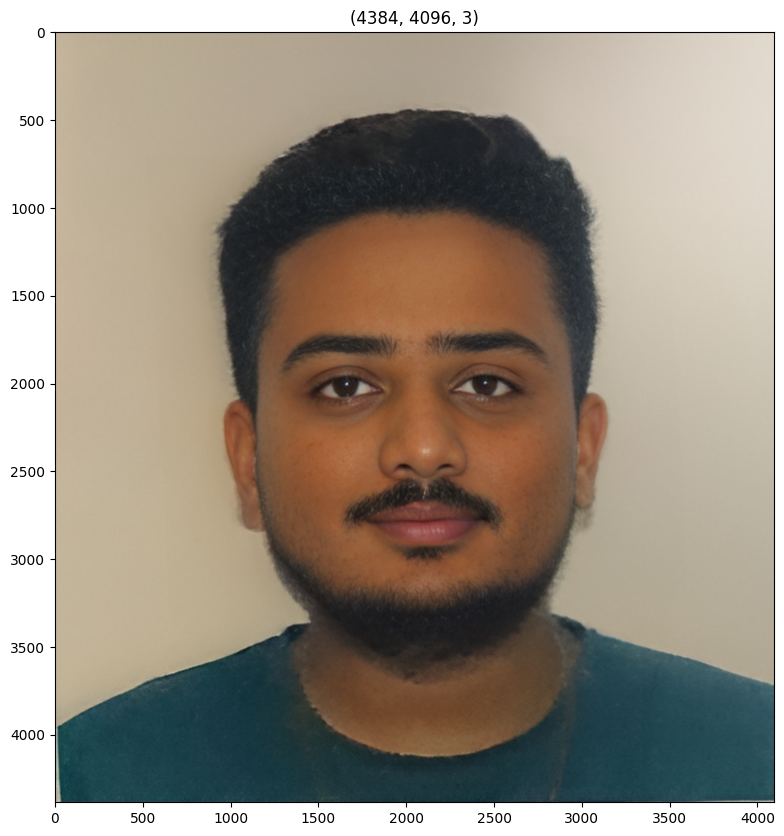

In [ ]:
# Plot the image
plt.figure(figsize=(10, 10))

hr_image = srmodel(img_output1)
print("Imput Image: ")
plt.title(img_input.shape)
plt.imshow(img_input)
plt.show()

plt.figure(figsize=(10, 10))
print("Face Resoration Image: ")
plt.title(img_output.shape)
plt.imshow(img_output)
plt.show()

plt.figure(figsize=(10, 10))
print("Super Resolution Image: ")
plt.title(hr_image.shape)
plt.imshow(hr_image)
plt.show()


#GFPGAN


In [ ]:
%cd /content
!rm -rf GFPGAN
!git clone https://github.com/TencentARC/GFPGAN.git
%cd GFPGAN

!pip install basicsr

!pip install facexlib

!pip install -r requirements.txt
!python setup.py develop
!pip install realesrgan  # used for enhancing the background (non-face) regions

!wget https://github.com/TencentARC/GFPGAN/releases/download/v1.3.0/GFPGANv1.3.pth -P experiments/pretrained_models


/content
Cloning into 'GFPGAN'...
remote: Enumerating objects: 523, done.
remote: Total 523 (delta 0), reused 0 (delta 0), pack-reused 523
Receiving objects: 100% (523/523), 5.39 MiB | 20.68 MiB/s, done.
Resolving deltas: 100% (264/264), done.
/content/GFPGAN
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.10/dist-packages/setuptools/__init__.py:84: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
!!

        ********************************************************************************
        Requirements should be satisfied by a PEP 517 installer.
        If you are using pip, you can try `pip install --use-pep517`.
        ************************************************************

In [ ]:
import os
from google.colab import files
import shutil

upload_folder = 'inputs/upload'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
os.mkdir(upload_folder)

uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

Saving adult1.jpg to adult1.jpg
move adult1.jpg to inputs/upload/adult1.jpg


In [ ]:

!rm -rf results
!python inference_gfpgan.py -i inputs/upload -o results -v 1.3 -s 4 --bg_upsampler realesrgan


!ls results/cmp

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional_tensor.py:5: UserWarning: The torchvision.transforms.functional_tensor module is deprecated in 0.15 and will be **removed in 0.17**. Please don't rely on it. You probably just need to use APIs in torchvision.transforms.functional or in torchvision.transforms.v2.functional.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Processing adult1.jpg ...
	Tile 1/8
	Tile 2/8
	Tile 3/8
	Tile 4/8
	Tile 5/8
	Tile 6/8
	Tile 7/8
	Tile 8/8
Results are in the [

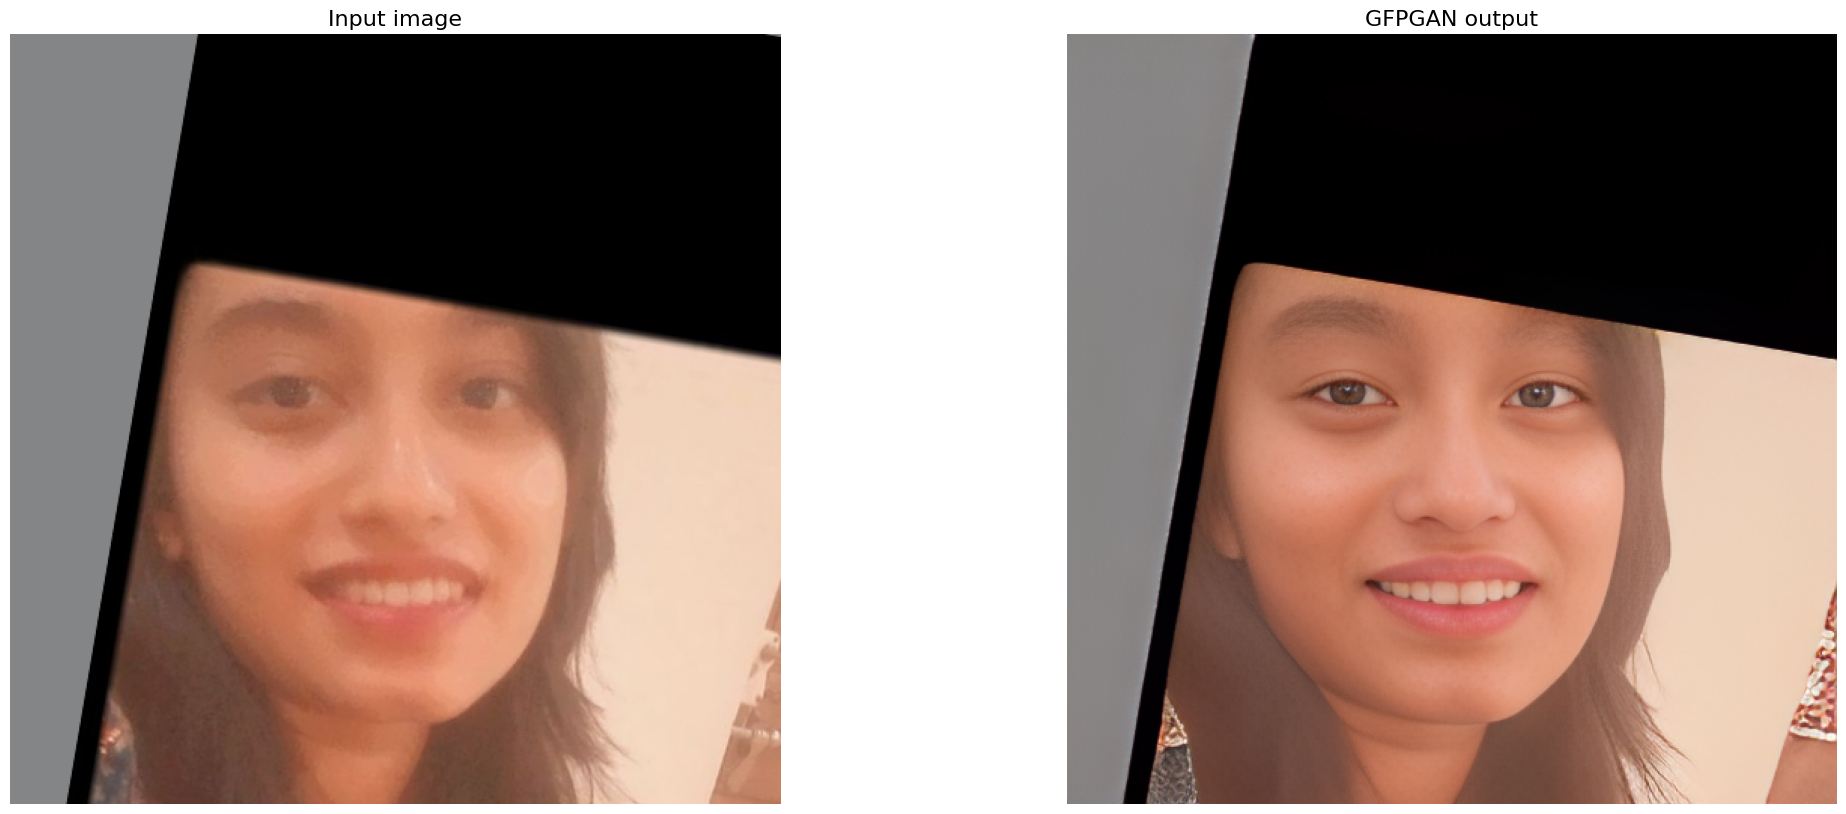

In [ ]:

import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1) 
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('GFPGAN output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# display each image in the upload folder
import os
import glob

input_folder = 'results/cropped_faces'
result_folder = 'results/restored_faces'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)


Cropped Face:  (1280, 644, 3)
GFPGAN Output:  (5120, 2576, 3)


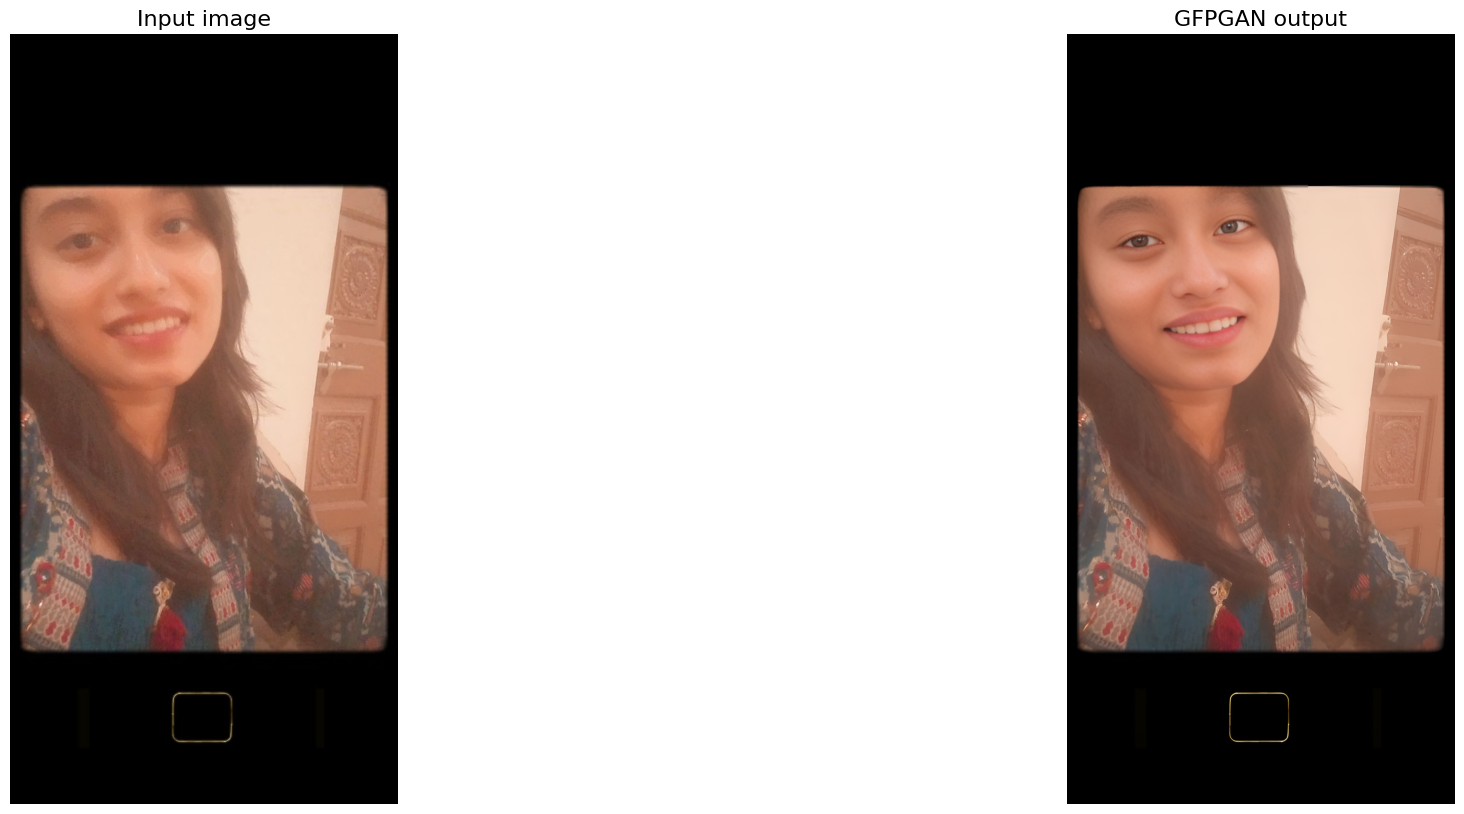

In [ ]:

import cv2
import matplotlib.pyplot as plt
def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1) 
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('GFPGAN output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)
def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

# display each image in the upload folder
import os
import glob

input_folder = 'inputs/upload'
result_folder = 'results/restored_imgs'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  print("Cropped Face: ", img_input.shape)
  print("GFPGAN Output: ", img_output.shape)
  display(img_input, img_output)

Cropped Face:  (512, 512, 3)
GFPGAN Output:  (512, 512, 3)


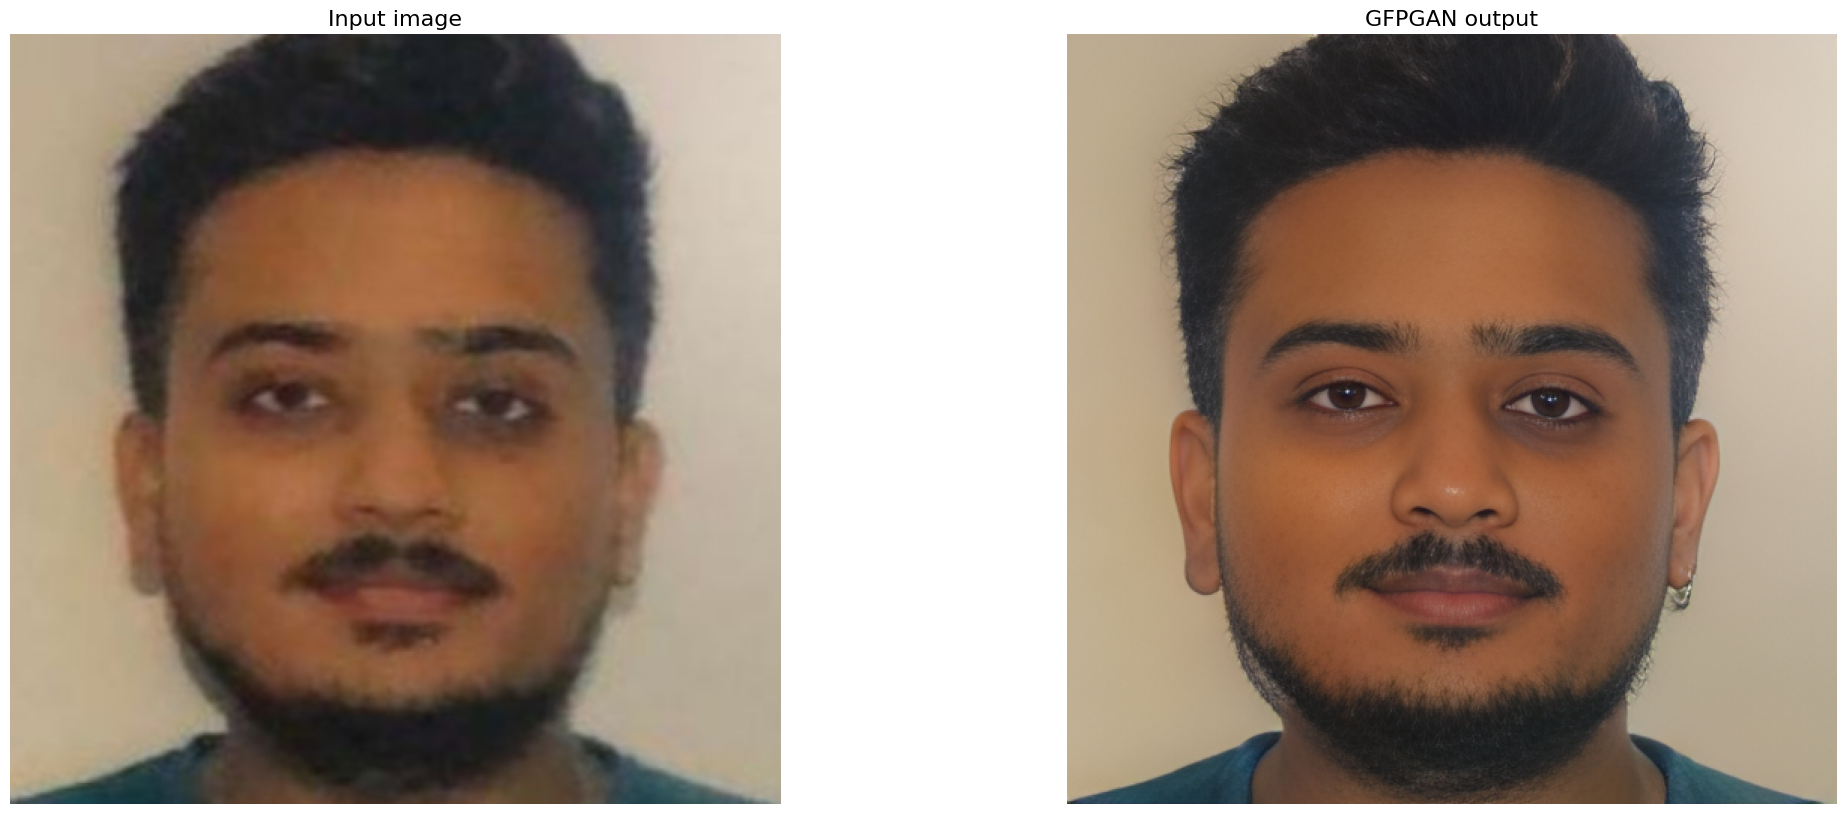

In [ ]:

input_folder = 'results/cropped_faces'
result_folder = 'results/restored_faces'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  print("Cropped Face: ", img_input.shape)
  print("GFPGAN Output: ", img_output.shape)
  display(img_input, img_output)


Cropped Face:  (514, 476, 3)
GFPGAN Output:  (2056, 1904, 3)


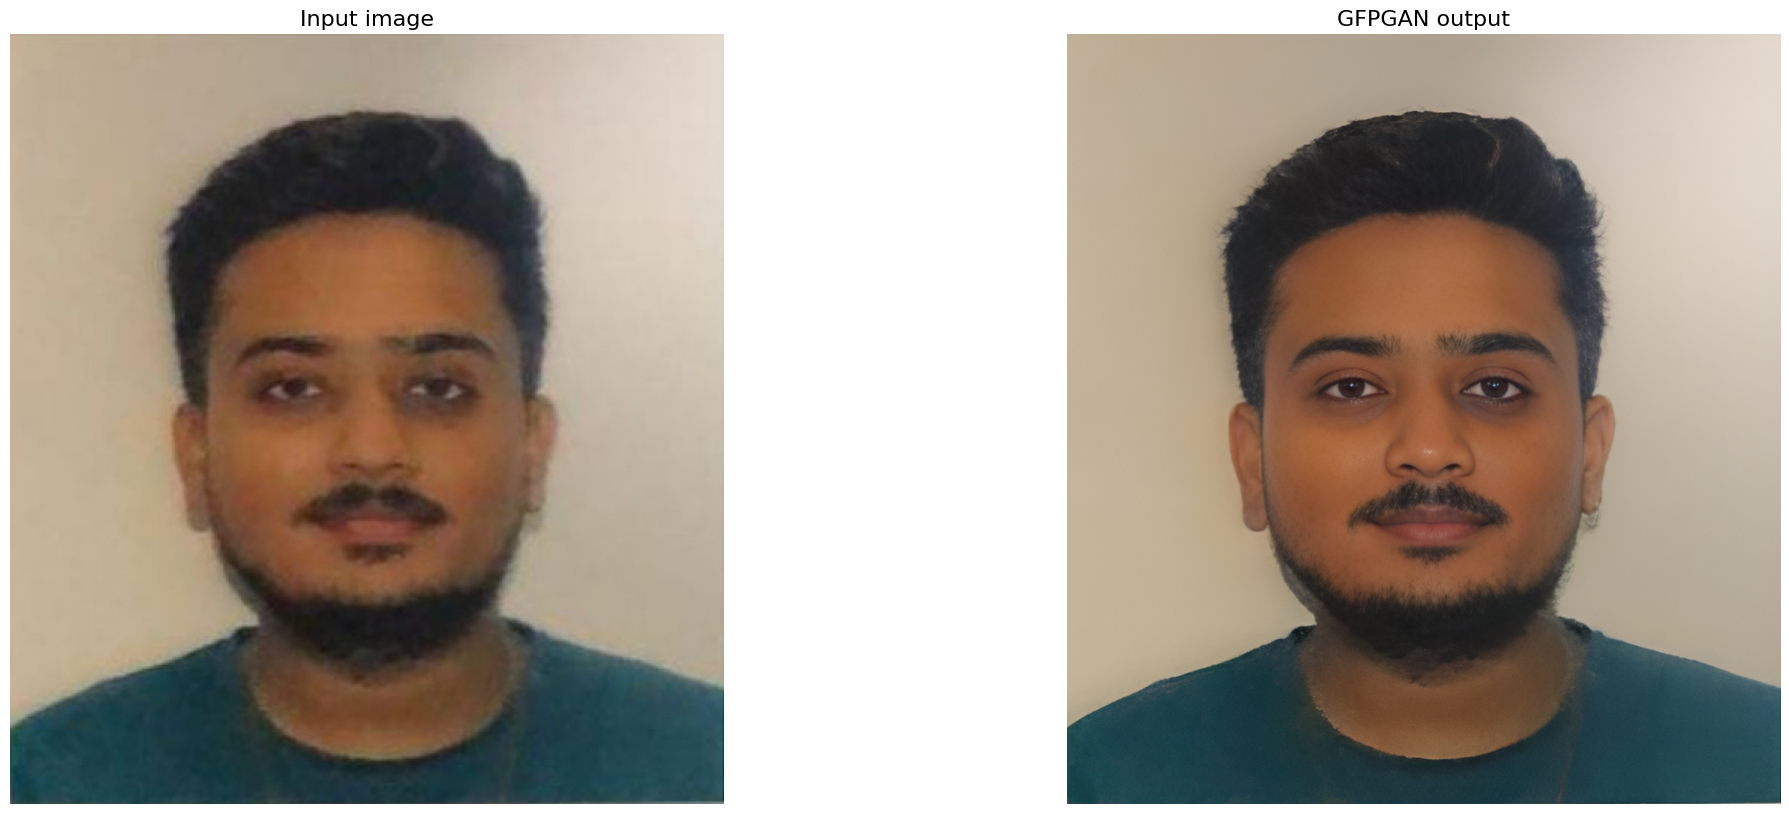

In [ ]:
input_folder = 'inputs/upload'
result_folder = 'results/restored_imgs'
input_list = sorted(glob.glob(os.path.join(input_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  print("Cropped Face: ", img_input.shape)
  print("GFPGAN Output: ", img_output.shape)
  display(img_input, img_output)

#AutoEncoder

In [ ]:
import numpy as np
import pandas as pd 

import os
import glob
import shutil
import matplotlib.pyplot as plt

In [ ]:
inp_base_dir = '../input/super-image-resolution/Data'
dirnames = ['LR', 'HR']
out_base_dir = './'

In [ ]:
for dirname in dirnames:
  img_path = os.path.join(inp_base_dir, dirname)
  images = glob.glob(img_path + '/*.png')
  print("{}: {} Images".format(dirname, len(images)))
  num_train = int(round(len(images)*0.8))
  train, val = images[:num_train], images[num_train:]

  for t in train:
    if not os.path.exists(os.path.join(out_base_dir, 'train', dirname)):
      os.makedirs(os.path.join(out_base_dir, 'train', dirname))
    shutil.copy(t, os.path.join(out_base_dir, 'train', dirname))

  for v in val:
    if not os.path.exists(os.path.join(out_base_dir, 'val', dirname)):
      os.makedirs(os.path.join(out_base_dir, 'val', dirname))
    shutil.copy(v, os.path.join(out_base_dir, 'val', dirname))

LR: 100 Images
HR: 100 Images


In [ ]:
train_dir = os.path.join(out_base_dir,'train')
val_dir  = os.path.join(out_base_dir, 'val')

In [ ]:
import tensorflow as tf
IMG_SHAPE = 256
# LATENT_DIM = 64
NUM_CHANNELS = 3

In [ ]:
def process_and_scale_train(filepath):
    img_input = tf.io.read_file(filepath)
    img_input = tf.image.decode_jpeg(img_input)
    img_input = tf.image.resize(img_input,[IMG_SHAPE,IMG_SHAPE])
    
    img_output = tf.io.read_file(train_dir + tf.strings.join(["/HR/", tf.strings.split(filepath, os.sep)[-1]]))
    img_output = tf.image.decode_jpeg(img_output)
    img_output = tf.image.resize(img_output,[IMG_SHAPE,IMG_SHAPE])
    
    return img_input/255., img_output/255.

In [ ]:
def process_and_scale_val(filepath):
    img_input = tf.io.read_file(filepath)
    img_input = tf.image.decode_jpeg(img_input)
    img_input = tf.image.resize(img_input,[IMG_SHAPE,IMG_SHAPE])
    
    img_output = tf.io.read_file(val_dir + tf.strings.join(["/HR/", tf.strings.split(filepath, os.sep)[-1]]))
    img_output = tf.image.decode_jpeg(img_output)
    img_output = tf.image.resize(img_output,[IMG_SHAPE,IMG_SHAPE])
    
    return img_input/255., img_output/255.

In [ ]:
train_ds_lr_files = tf.data.Dataset.list_files(train_dir + "/LR/*", shuffle = False)
val_ds_lr_files = tf.data.Dataset.list_files(val_dir + "/LR/*", shuffle = False)

In [ ]:
train_dataset_lr = train_ds_lr_files.shuffle(len(train_ds_lr_files)).map(process_and_scale_train).batch(8).prefetch(tf.data.AUTOTUNE)
val_dataset_lr = val_ds_lr_files.map(process_and_scale_val).batch(8).prefetch(tf.data.AUTOTUNE)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Conv2DTranspose, Lambda, Reshape, Flatten

In [ ]:
input_img = tf.keras.layers.Input(shape=(IMG_SHAPE, IMG_SHAPE, 3)) 

l1 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(input_img)
l2 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l1)
l3 = tf.keras.layers.MaxPool2D(padding='same')(l2)

l4 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l3)
l5 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l4)
l6 = tf.keras.layers.MaxPool2D(padding='same')(l5)

l7 = tf.keras.layers.Conv2D(256, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l6)

l8 = tf.keras.layers.Conv2DTranspose(64, 3, 
                                     padding='same', 
                                     activation='relu',
                                     strides=(2,2))(l7)
l9 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l8)
l10 = tf.keras.layers.Conv2D(128, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l9)

l11 = tf.keras.layers.add([l10, l5])

l12 = tf.keras.layers.Conv2DTranspose(64, 3, 
                                     padding='same', 
                                     activation='relu',
                                     strides=(2,2))(l11)
l13 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l12)
l14 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l13)

l15 = tf.keras.layers.add([l14, l2])

decoded_image = tf.keras.layers.Conv2D(3, (3, 3), padding='same', kernel_initializer='he_uniform', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l15)

autoencoder = tf.keras.models.Model(inputs=(input_img), outputs=decoded_image)

autoencoder.compile(optimizer = tf.keras.optimizers.Adadelta(learning_rate=0.01), #optimizer='adam', #optimizer='adadelta',
                    loss='mean_absolute_error', 
                    metrics = [tf.keras.metrics.RootMeanSquaredError(name = 'rmse')])

In [ ]:
autoencoder.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 64) 36928       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 128, 128, 64) 0           conv2d_1[0][0]                   
______________________________________________________________________________________________

## **Model Training**

In [ ]:
history = autoencoder.fit(train_dataset_lr,
                          validation_data = val_dataset_lr,
                          epochs = 500) 

Epoch 1/500
10/10 [==============================] - 12s 287ms/step - loss: 0.2804 - rmse: 0.3601 - val_loss: 0.1925 - val_rmse: 0.2776
Epoch 2/500
10/10 [==============================] - 2s 179ms/step - loss: 0.2114 - rmse: 0.2963 - val_loss: 0.1537 - val_rmse: 0.2352
Epoch 3/500
10/10 [==============================] - 2s 180ms/step - loss: 0.1764 - rmse: 0.2580 - val_loss: 0.1331 - val_rmse: 0.2013
Epoch 4/500
10/10 [==============================] - 2s 178ms/step - loss: 0.1585 - rmse: 0.2283 - val_loss: 0.1093 - val_rmse: 0.1609
Epoch 5/500
10/10 [==============================] - 2s 181ms/step - loss: 0.1271 - rmse: 0.1824 - val_loss: 0.0993 - val_rmse: 0.1474
Epoch 6/500
10/10 [==============================] - 2s 179ms/step - loss: 0.1167 - rmse: 0.1698 - val_loss: 0.0949 - val_rmse: 0.1410
Epoch 7/500
10/10 [==============================] - 2s 180ms/step - loss: 0.1142 - rmse: 0.1648 - val_loss: 0.0914 - val_rmse: 0.1357
Epoch 8/500
10/10 [==============================] - 2

In [ ]:
def plot_model(model_name_history):
    fig, ax = plt.subplots(1, 2,figsize=(15,5))

    ax[0].plot(model_name_history.history['loss'], label='loss')
    ax[0].plot(model_name_history.history['val_loss'], label='val_loss')
    ax[0].legend()
    
    ax[1].plot(model_name_history.history['rmse'], label='rmse')
    ax[1].plot(model_name_history.history['val_rmse'], label='val_rmse')
    ax[1].legend()

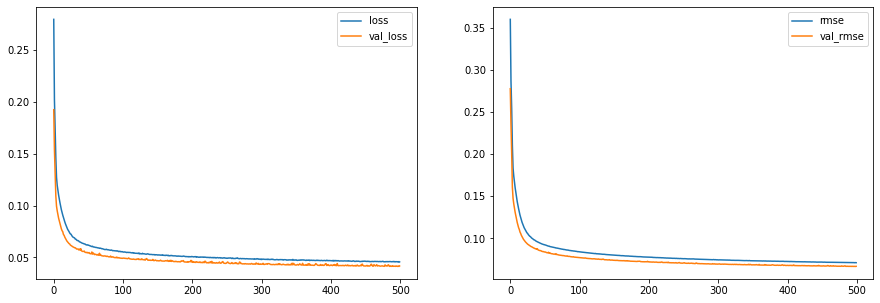

In [ ]:
plot_model(history)

In [ ]:
import cv2

In [ ]:
img1=cv2.imread('/kaggle/input/newtestt/adult2.JPG')

In [ ]:
predimg=autoencoder.predict(img1)

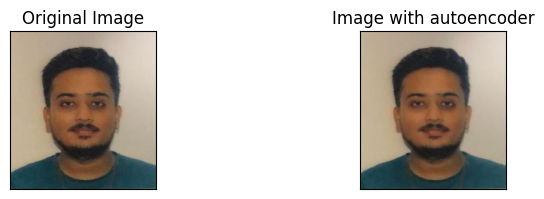

In [ ]:
plt.subplot(131),plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.subplot(133),plt.imshow(cv2.cvtColor(predimg, cv2.COLOR_BGR2RGB))
plt.title('Image with autoencoder')
plt.show()  

#ESRGan

In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import wandb
from keras.models import load_model

In [ ]:
def load(path,shape):
    img= cv2.imread(path)
    img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img= cv2.resize(img, shape)
    return img

In [ ]:
low_shape = (96, 96, 3)
high_shape = (384, 384, 3)

In [ ]:
import glob

def get_data(directory):
    X = []
    y = []
    for folder in glob.glob(directory+ str('/*')):
        for img_path in glob.glob(folder+ str('/*')):      
            if folder == os.path.join(directory, 'HR'):
                X.append(load(img_path, low_shape[:-1]))
            elif folder == os.path.join(directory, 'LR'):
                y.append(load(img_path, high_shape[:-1]))

    X = np.array(X)
    y = np.array(y)
    return X, y

In [ ]:
LR_train, HR_train = get_data('../input/super-image-resolution/Data')
LR_train.shape, HR_train.shape

((100, 96, 96, 3), (100, 384, 384, 3))

In [ ]:
from sklearn.model_selection import train_test_split

LR_train, LR_val, HR_train, HR_val = train_test_split(LR_train, HR_train, test_size=0.1)
print(LR_train.shape, HR_train.shape)
print(LR_val.shape, HR_val.shape)

(90, 96, 96, 3) (90, 384, 384, 3)
(10, 96, 96, 3) (10, 384, 384, 3)


In [ ]:
import tensorflow as tf
from keras.layers import BatchNormalization, GlobalAvgPool2D, LeakyReLU, Lambda
from keras.layers import Conv2D, Dense, Add, Rescaling
from tensorflow.nn import depth_to_space
from keras import Model
from keras import Input
from wandb.keras import WandbCallback
class ESRGAN(object):
    def generator(scaling_factor, feature_maps, residual_blocks, leaky_alpha, 
                  residual_scalar):
        input_layer = Input((None, None, 3))
        xIn = Rescaling(scale=1.0/255, offset=0.0)(input_layer)

        xIn = Conv2D(filters=feature_maps, kernel_size=9, padding="same")(xIn)
        xIn = LeakyReLU(leaky_alpha)(xIn)

        # construct the residual in residual block
        x = Conv2D(filters=feature_maps, kernel_size=3, padding="same")(xIn)
        x1 = LeakyReLU(leaky_alpha)(x)
        x1 = Add()([xIn, x1])

        x = Conv2D(filters=feature_maps, kernel_size=3, padding="same")(x1)
        x2 = LeakyReLU(leaky_alpha)(x)
        x2 = Add()([x1, x2])

        x = Conv2D(filters=feature_maps, kernel_size=3, padding="same")(x2)
        x3 = LeakyReLU(leaky_alpha)(x)
        x3 = Add()([x2, x3])

        x = Conv2D(filters=feature_maps, kernel_size=3, padding="same")(x3)
        x4 = LeakyReLU(leaky_alpha)(x)
        x4 = Add()([x3, x4])
        x4 = Conv2D(filters=feature_maps, kernel_size=3, padding="same")(x4)

        xSkip = Add()([xIn, x4])

        # scale the residual outputs with a scalar between [0,1]
        xSkip = Lambda(lambda x: x * residual_scalar)(xSkip)

        # create a number of residual in residual blocks
        for blockId in range(residual_blocks-1):
            x = Conv2D(filters=feature_maps, kernel_size=3, padding="same")(xSkip)
            x1 = LeakyReLU(leaky_alpha)(x)
            x1 = Add()([xSkip, x1])

            x = Conv2D(filters=feature_maps, kernel_size=3, padding="same")(x1)
            x2 = LeakyReLU(leaky_alpha)(x)
            x2 = Add()([x1, x2])

            x = Conv2D(filters=feature_maps, kernel_size=3, padding="same")(x2)
            x3 = LeakyReLU(leaky_alpha)(x)
            x3 = Add()([x2, x3])

            x = Conv2D(filters=feature_maps, kernel_size=3, padding="same")(x3)
            x4 = LeakyReLU(leaky_alpha)(x)
            x4 = Add()([x3, x4])
            x4 = Conv2D(filters=feature_maps, kernel_size=3, padding="same")(x4)

            xSkip = Add()([xSkip, x4])
            xSkip = Lambda(lambda x: x * residual_scalar)(xSkip)

        x = Conv2D(filters=feature_maps, kernel_size=3, padding="same")(xSkip)
        x = Add()([xIn, x])

        # upscale the image with pixel shuffle
        x = Conv2D(filters=feature_maps * (scaling_factor // 2), kernel_size=3, 
                   padding="same")(x)
        x = tf.nn.depth_to_space(x, 2)
        x = LeakyReLU(leaky_alpha)(x)

        # upscale the image with pixel shuffle
        x = Conv2D(filters=feature_maps, kernel_size=3, padding="same")(x)
        x = tf.nn.depth_to_space(x, 2)
        x = LeakyReLU(leaky_alpha)(x)

        x = Conv2D(filters=3, kernel_size=9, padding="same", activation="tanh")(x)
        output_layer = Rescaling(scale=127.5, offset=127.5)(x)

        generator = Model(inputs=input_layer, outputs=output_layer)

        return generator

    def discriminator(feature_maps, leaky_alpha, disc_blocks):
        input_layer = Input((None, None, 3))

        x = Rescaling(scale=1.0/127.5, offset=-1)(input_layer)
        x = Conv2D(filters=feature_maps, kernel_size=3, padding="same")(x)
        x = LeakyReLU(leaky_alpha)(x)

        x = Conv2D(filters=feature_maps, kernel_size=3, padding="same")(x)
        x = BatchNormalization()(x)
        x = LeakyReLU(leaky_alpha)(x)

    # create a downsample conv kernel config
        downConvConf = {
            "strides": (2,2),
            "padding": "same",
        }

        # create a number of discriminator blocks
        for i in range(1, disc_blocks):

            x = Conv2D(filters=feature_maps * (2 ** i), kernel_size=3, **downConvConf)(x)
            x = BatchNormalization()(x)
            x = LeakyReLU(leaky_alpha)(x)

            x = Conv2D(filters=feature_maps * (2 ** i), kernel_size=3, padding="same")(x)
            x = BatchNormalization()(x)
            x = LeakyReLU(leaky_alpha)(x)

        x = GlobalAvgPool2D()(x)
        x = LeakyReLU(leaky_alpha)(x)
        output_layer = Dense(1, activation="sigmoid")(x)

        discriminator = Model(inputs=input_layer, outputs=output_layer)

        return discriminator

In [ ]:
from keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow import reduce_mean
from tensorflow.keras.losses import Reduction

class Losses:
    def __init__(self):
        pass
    
    def bce_loss(self, real, pred):
        bce = BinaryCrossentropy(reduction=Reduction.NONE)
        loss = bce(real, pred)
        loss = reduce_mean(loss)
        return loss
    
    def mse_loss(self, real, pred):
        mse = MeanSquaredError(reduction=Reduction.NONE)
        loss = mse(real, pred)
        loss = reduce_mean(loss)
        return loss

In [ ]:
from tensorflow import concat, zeros, GradientTape, ones
from keras.activations import sigmoid
from tensorflow.math import reduce_mean

class ESRGANTraining(Model):
    def __init__(self, generator, discriminator, vgg, batch_size):
        super().__init__()
        self.generator = generator
        self.discriminator = discriminator
        self.vgg = vgg
        self.batch_size = batch_size
    def compile(self, generator_optimizer, discriminator_optimizer, bce_loss, mse_loss):
        super().compile()
        self.generator_optimizer = generator_optimizer
        self.discriminator_optimizer = discriminator_optimizer

        self.bce_loss = bce_loss
        self.mse_loss = mse_loss
    
    def train_step(self, images):
        (lr_images, hr_images) = images
        lr_images = tf.cast(lr_images, tf.float32)
        hr_images = tf.cast(hr_images, tf.float32)

        sr_images = self.generator(lr_images)
        combined_images = concat([sr_images, hr_images], axis=0)
        labels = concat([zeros((self.batch_size, 1)), ones((self.batch_size, 1))], axis=0)
        
        with GradientTape() as tape:
            raw_preds = self.discriminator(combined_images)
            raw_fake = raw_preds[:self.batch_size]
            raw_real = raw_preds[self.batch_size:]

            predFake = sigmoid(raw_fake - reduce_mean(raw_real)) 
            predReal = sigmoid(raw_real - reduce_mean(raw_fake))

            predictions = concat([predFake, predReal], axis=0)
            d_loss = self.bce_loss(labels, predictions)

        grads = tape.gradient(d_loss, self.discriminator.trainable_variables)
        
        self.discriminator_optimizer.apply_gradients(zip(grads, 
                                                         self.discriminator.trainable_variables))
        miss_leading_labels = ones((self.batch_size, 1))

        with GradientTape() as tape:
            fake_images = self.generator(lr_images)

            raw_preds = self.discriminator(fake_images)
            real_preds = self.discriminator(hr_images)
            relativistic_preds = raw_preds - reduce_mean(real_preds)
            predictions = sigmoid(relativistic_preds)

            g_loss = self.bce_loss(miss_leading_labels, predictions)

            pixel_loss = self.mse_loss(hr_images, fake_images)

            sr_VGG = tf.keras.applications.vgg19.preprocess_input(fake_images)
            sr_VGG = self.vgg(sr_VGG) / 12.75
            hr_VGG = tf.keras.applications.vgg19.preprocess_input(hr_images)
            hr_VGG = self.vgg(hr_VGG) / 12.75

            perc_loss = self.mse_loss(hr_VGG, sr_VGG)

            g_total_loss = 5e-3 * g_loss + perc_loss + 1e-2 * pixel_loss
        grads = tape.gradient(g_total_loss, self.generator.trainable_variables)
        self.generator_optimizer.apply_gradients(zip(grads, self.generator.trainable_variables))
        
        return {"d_loss": d_loss, "g_total_loss": g_total_loss, "g_loss": g_loss, 
                "perc_loss": perc_loss, "pixel_loss": pixel_loss}

In [ ]:
from tensorflow.keras.applications import VGG19

class VGG:
    def build():
        vgg = VGG19(input_shape=(None, None, 3), weights="imagenet", include_top=False)
        model = Model(vgg.input, vgg.layers[20].output)
        return model

In [ ]:
BASE_IMAGE_PATH = "Samples_save"
os.makedirs(BASE_IMAGE_PATH, exist_ok=True)

In [ ]:
# dataset specs
SCALING_FACTOR = 4

# GAN model specs
FEATURE_MAPS = 64
RESIDUAL_BLOCKS = 16
LEAKY_ALPHA = 0.2
DISC_BLOCKS = 4
RESIDUAL_SCALAR = 0.2

# training specs
PRETRAIN_LR = 1e-4
FINETUNE_LR = 3e-5
PRETRAIN_EPOCHS = 1500
FINETUNE_EPOCHS = 1000
TRAIN_BATCH_SIZE = 10

INFER_BATCH_SIZE = 10

In [ ]:
os.makedirs("model", exist_ok=True)

gen_model_path = "/kaggle/input/models/gen_model.h5"
ESRGAN_model_path = "/kaggle/input/models/ESRGAN_model.h5"

In [ ]:
from tensorflow.keras.optimizers import Adam
import pytorch_lightning as pl

In [ ]:
losses = Losses()

generator = ESRGAN.generator(scaling_factor=SCALING_FACTOR,
                             feature_maps=FEATURE_MAPS,
                             residual_blocks=RESIDUAL_BLOCKS,
                             leaky_alpha=LEAKY_ALPHA,
                             residual_scalar=RESIDUAL_SCALAR)

generator.compile(optimizer=Adam(learning_rate=PRETRAIN_LR),
                  loss=losses.mse_loss)

print("[INFO] pretraining ESRGAN generator ...")
generator.fit(LR_train, HR_train, epochs=PRETRAIN_EPOCHS, batch_size=TRAIN_BATCH_SIZE,callbacks=[WandbCallback()])

print("[INFO] saving the pretrained generator...")
generator.save(gen_model_path)

[INFO] pretraining ESRGAN generator ...


Incomplete shape.
Incomplete shape.


Epoch 1/1500
9/9 [==============================] - 8s 306ms/step - loss: 4804.5308
Epoch 2/1500
9/9 [==============================] - 3s 294ms/step - loss: 4707.9824
Epoch 3/1500
9/9 [==============================] - 3s 294ms/step - loss: 4592.7295
Epoch 4/1500
9/9 [==============================] - 3s 294ms/step - loss: 3968.3430
Epoch 5/1500
9/9 [==============================] - 3s 293ms/step - loss: 2343.5381
Epoch 6/1500
9/9 [==============================] - 3s 294ms/step - loss: 1520.3839
Epoch 7/1500
9/9 [==============================] - 3s 296ms/step - loss: 1295.6598
Epoch 8/1500
9/9 [==============================] - 3s 296ms/step - loss: 1171.0093
Epoch 9/1500
9/9 [==============================] - 3s 290ms/step - loss: 1154.8578
Epoch 10/1500
9/9 [==============================] - 3s 290ms/step - loss: 1116.1991
Epoch 11/1500
9/9 [==============================] - 3s 290ms/step - loss: 1040.4902
Epoch 12/1500
9/9 [==============================] - 3s 290ms/step - loss:

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
egenerator.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
rescaling_1 (Rescaling)         (None, None, None, 3 0           input_7[0][0]                    
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, None, None, 6 15616       rescaling_1[0][0]                
__________________________________________________________________________________________________
leaky_re_lu_9 (LeakyReLU)       (None, None, None, 6 0           conv2d_8[0][0]                   
____________________________________________________________________________________________

In [ ]:
from keras.models import load_model

losses = Losses()
generator = load_model(gen_model_path, 
                       custom_objects={"mse_loss": losses.mse_loss})

vgg = VGG.build()
discriminator = ESRGAN.discriminator(feature_maps=FEATURE_MAPS, 
                                     leaky_alpha=LEAKY_ALPHA, 
                                     disc_blocks=DISC_BLOCKS)

esrgan = ESRGANTraining(generator=generator, discriminator=discriminator, 
                        vgg=vgg, batch_size=TRAIN_BATCH_SIZE)

esrgan.compile(discriminator_optimizer=Adam(learning_rate=FINETUNE_LR),
               generator_optimizer=Adam(learning_rate=FINETUNE_LR),
               bce_loss=losses.bce_loss,
               mse_loss=losses.mse_loss)

print("[INFO] training ESRGAN...")
esrgan.fit(LR_train, HR_train, epochs=FINETUNE_EPOCHS, batch_size=TRAIN_BATCH_SIZE,callbacks=[WandbCallback()] )

print("[INFO] saving ESRGAN generator to {}...".format(ESRGAN_model_path))
esrgan.generator.save(ESRGAN_model_path)

wandb: WARNING Unable to compute FLOPs for this model.


[INFO] training ESRGAN...
Epoch 1/1000
9/9 [==============================] - 20s 1s/step - d_loss: 0.6932 - g_total_loss: 0.6664 - g_loss: 0.6931 - perc_loss: 0.0252 - pixel_loss: 63.7788
Epoch 2/1000
9/9 [==============================] - 13s 1s/step - d_loss: 0.6932 - g_total_loss: 0.4869 - g_loss: 0.6931 - perc_loss: 0.0251 - pixel_loss: 45.8287
Epoch 3/1000
9/9 [==============================] - 13s 1s/step - d_loss: 0.6931 - g_total_loss: 0.3574 - g_loss: 0.6932 - perc_loss: 0.0243 - pixel_loss: 32.9633
Epoch 4/1000
9/9 [==============================] - 13s 1s/step - d_loss: 0.6931 - g_total_loss: 0.3438 - g_loss: 0.6932 - perc_loss: 0.0243 - pixel_loss: 31.6092
Epoch 5/1000
9/9 [==============================] - 13s 1s/step - d_loss: 0.6931 - g_total_loss: 0.3192 - g_loss: 0.6932 - perc_loss: 0.0236 - pixel_loss: 29.2144
Epoch 6/1000
9/9 [==============================] - 13s 1s/step - d_loss: 0.6930 - g_total_loss: 0.3129 - g_loss: 0.6933 - perc_loss: 0.0237 - pixel_loss: 28.5

In [ ]:
lr_image, hr_image = LR_val, HR_val

print("[INFO] loading the pre-trained and fully trained ESRGAN model...")
esrgan_pre_gen = load_model(gen_model_path, compile=False)
esrgan_gen = load_model(ESRGAN_model_path, compile=False)

print("[INFO] making predictions with pre-trained and fully trained ESRGAN model...")
esrgan_pre_gen_pred = esrgan_pre_gen.predict(lr_image)
esrgan_gen_pred = esrgan_gen.predict(hr_image)

[INFO] loading the pre-trained and fully trained ESRGAN model...
[INFO] making predictions with pre-trained and fully trained ESRGAN model...


In [ ]:
img=cv2.imread('/kaggle/input/testset/soni.JPG')
# esrgan_pre_gen.predict(img)

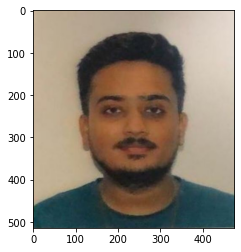

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

(1, 514, 476, 3)
(1, 2056, 1904, 3)


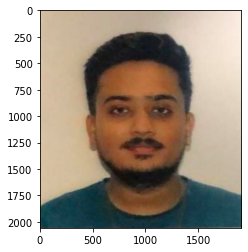

In [ ]:
x,y,z=np.array(img).shape
img1=img.reshape(1,x,y,z)
print(np.array(img1).shape)
# print(np.array([LR_val[0]]).shape)
esrgan_pre_gen_pred = esrgan_gen.predict(np.array(img1))
# plt.imshow(array_to_img(esrgan_pre_gen_pred.reshape(high_shape)*255))
print(esrgan_pre_gen_pred.shape)
_,nx,ny,nz=esrgan_pre_gen_pred.shape
esrgan_pre_gen_pred1=esrgan_pre_gen_pred.reshape(nx,ny,nz)
esrgan_pre_gen_pred2=array_to_img(esrgan_pre_gen_pred1)
plt.imshow(cv2.cvtColor(np.array(esrgan_pre_gen_pred2), cv2.COLOR_BGR2RGB))
plt.show()